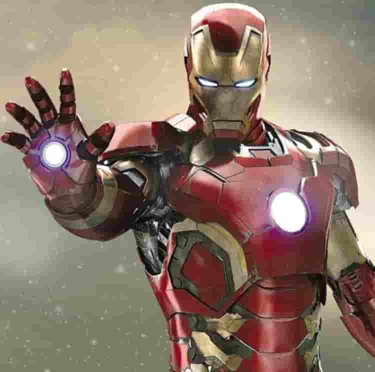

ValueError: cannot reshape array of size 279000 into shape (372,375)

In [6]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def random_sample(low, high):
    return low + (high - low) * random.random()

def initialize_centroids(data, k):
    min_values = np.min(data, axis=0)
    max_values = np.max(data, axis=0)
    centroids = []
    for _ in range(k):
        centroid = [random_sample(min_val, max_val) for min_val, max_val in zip(min_values, max_values)]
        centroids.append(centroid)
    return centroids


def get_labels(data, centroids):
    labels = []
    for point in data:
        min_dist = float('inf')
        label = None
        for i, centroid in enumerate(centroids):
            new_dist = get_distance(point, centroid)
            if new_dist < min_dist:
                min_dist = new_dist
                label = i
        labels.append(label)
    return labels

def update_centroids(data, labels, k):
    new_centroids = [[0, 0] for _ in range(k)]
    counts = [0] * k
    for point, label in zip(data, labels):
        new_centroids[label][0] += point[0]
        new_centroids[label][1] += point[1]
        counts[label] += 1
    for i, (total_x, total_y) in enumerate(new_centroids):
        new_centroids[i] = [total_x / counts[i], total_y / counts[i]]
    return new_centroids

def should_stop(old_centroids, centroids, threshold=1e-4):
    total_distance = 0
    for old_c, new_c in zip(old_centroids, centroids):
        total_distance += get_distance(old_c, new_c)
    return total_distance < threshold

def get_distance(a, b):
    a_arr = np.array(a)
    b_arr = np.array(b)
    
    if a_arr.shape != b_arr.shape:
        # Pad the smaller array with zeros
        max_size = max(a_arr.size, b_arr.size)
        a_arr = np.pad(a_arr, (0, max_size - a_arr.size), mode='constant')
        b_arr = np.pad(b_arr, (0, max_size - b_arr.size), mode='constant')
    
    return np.sqrt(np.sum((a_arr - b_arr) ** 2))







def main(data, k):
    centroids = initialize_centroids(data, k)
    while True:
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = update_centroids(data, labels, k)
        if should_stop(old_centroids, centroids):
            break
    return labels, centroids

# Read and preprocess the image
image = Image.open('ironMan.jpg')

# Define the scaling factor for image size
scaling_factor = 0.5  # Adjust this value to change the size of the shrunk images

# Resize the image using the scaling factor
new_width = int(image.width * scaling_factor)
new_height = int(image.height * scaling_factor)
image = image.resize((new_width, new_height))

# Convert the image to a numpy array
image_data = np.array(image)

# Flatten the image data
reshaped_data = image_data.reshape(-1, 3)

# Define different values of k
k_values = [2, 5, 10]  # Change these values as per your requirement

# Display images for different k values
display(HTML('<h2>Original Image (Shrunk)</h2>'))
display(image)

for k in k_values:
    # Apply k-means clustering
    labels, centroids = main(reshaped_data, k)

    # Replace pixel values with centroid values
    new_image_data = np.array([centroids[label] for label in labels])

    # Resize the new_image_data array to match the size of the original image
    new_image_data = new_image_data.reshape(image_data.shape[:2]).astype(np.uint8)
    new_image_data = np.repeat(new_image_data[:, :, np.newaxis], 3, axis=2)

    # Convert the data back to image format
    new_image = Image.fromarray(new_image_data)
    # Resize the clustered image using the scaling factor
    new_image = new_image.resize((new_width, new_height))

    # Display the clustered image
    display(HTML(f'<h2>Clustered Image (k={k})</h2>'))
    display(new_image)

